In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [2]:
df_czh = pd.read_csv("Huaneng/Huaneng_cangzhou.csv")
df_dzu = pd.read_csv("Huaneng/Huaneng_Dezhou.csv")
df_fzu = pd.read_csv("Huaneng/Huaneng_Fuzhou.csv")
df_hmn = pd.read_csv("Huaneng/Huaneng_haimen.csv")
df_jlg = pd.read_csv("Huaneng/Huaneng_jinling.csv")
df_lwu = pd.read_csv("Huaneng/Huaneng_laiwu.csv")
df_lhg = pd.read_csv("Huaneng/Huaneng_luohuang.csv")
df_pgg = pd.read_csv("Huaneng/Huaneng_pingliang.csv")
df_qnb = pd.read_csv("Huaneng/Huaneng_qinbei.csv")
df_sgn = pd.read_csv("Huaneng/Huaneng_shangan.csv")
df_sgd = pd.read_csv("Huaneng/Huaneng_shangdu.csv")
df_ygu = pd.read_csv("Huaneng/Huaneng_yangluo.csv")
df_ymn = pd.read_csv("Huaneng/Huaneng_yimin.csv")
df_yyg = pd.read_csv("Huaneng/Huaneng_yueyang.csv")
df_yhn = pd.read_csv("Huaneng/Huaneng_yuhuan.csv")
df_sgk = pd.read_csv("Huaneng/Shidongkou.csv")

In [3]:
df_czh = pd.read_csv("Huaneng/Huaneng_cangzhou.csv")

In [4]:
plant_list = [df_czh, df_dzu, df_fzu, df_hmn, df_jlg, df_lwu, df_lhg, df_pgg, df_qnb, df_sgn, df_sgd, df_ygu, df_ymn, df_yyg, df_yhn, df_sgk]
plant_names = ['cangzhou','dezhou','fuzhou','haimen','jinling','laiwu','luohuang','pingliang','qinbei','shangan','shangdu','yangluo','yimin','yueyang','yuhuan','shidongkou']

for plant in plant_list:
    plant.columns = ['date','NO2']

In [5]:
def change_numeric (a):
    for col in a.columns:
        if col !=  "date":
            a[col] = pd.to_numeric(a[col], errors ='coerce')


for i in range(len(plant_list)):
    plant_list[i].drop(list(range(0,7)), inplace =True)




In [6]:
for plant in plant_list:
    change_numeric(plant)

df_sgk.dtypes

date     object
NO2     float64
dtype: object

In [7]:
df_sgk.describe()

,NO2
count,4.181000e+03
mean,-7.679885e+29
std,6.195376e+29
min,-1.267651e+30
25%,-1.267651e+30
50%,-1.267651e+30
75%,4.803923e+15
max,1.801399e+16


In [8]:
cleaned_list = []
for a in plant_list: 
    a['date'] = pd.to_datetime(a['date'])
    a = a.sort_values('date')
    a = a.dropna(subset=['NO2'])
    a = a[a['NO2'] > 0]
    a = a.reset_index(drop=True)
    cleaned_list.append(a)

plant_list = cleaned_list



In [9]:
def month_avg(a):
    date_col ="date"
    a[date_col] = pd.to_datetime(a[date_col])
    a['YearMonth'] = a[date_col].dt.to_period('M')
    monthly_avg = a.groupby('YearMonth').mean(numeric_only =True).reset_index()
    monthly_avg['YearMonth'] = monthly_avg['YearMonth'].astype(str)
    return monthly_avg

In [10]:
month_avglist = []

for df in cleaned_list:
    monthly_data = month_avg(df)
    month_avglist.append(monthly_data)

print(month_avglist[0].head())

  YearMonth           NO2
0   2014-01  1.255176e+16
1   2014-02  9.945336e+15
2   2014-03  9.320741e+15
3   2014-04  8.510258e+15
4   2014-05  7.370196e+15


In [11]:
 print(month_avglist[0])

    YearMonth           NO2
0     2014-01  1.255176e+16
1     2014-02  9.945336e+15
2     2014-03  9.320741e+15
3     2014-04  8.510258e+15
4     2014-05  7.370196e+15
..        ...           ...
133   2025-02  5.402726e+15
134   2025-03  1.007141e+16
135   2025-04  6.189029e+15
136   2025-05  4.479922e+15
137   2025-06  4.107945e+15

[138 rows x 2 columns]


In [12]:
month_avg_dfs_for_merge = []

for i, df_cleaned in enumerate(cleaned_list):
    plant_identifier = plant_names[i]

    monthly_data_df = month_avg(df_cleaned)

    new_column_name = f"{plant_identifier}_NO2_monthly_avg"
    monthly_data_df.rename(columns={'NO2_monthly_avg': new_column_name}, inplace=True)
    month_avg_dfs_for_merge.append(monthly_data_df)



In [13]:
dfs_for_final_merge = []

for i, monthly_df in enumerate(month_avglist):
    plant_identifier = plant_names[i]
    df_copy = monthly_df.copy()

    new_column_name = f"{plant_identifier}_NO2"
    df_copy.rename(columns={'NO2': new_column_name}, inplace=True)

    dfs_for_final_merge.append(df_copy)

final_merged_df = None 

if dfs_for_final_merge:
    final_merged_df = dfs_for_final_merge[0]

    for i in range(1, len(dfs_for_final_merge)):
        df_to_merge = dfs_for_final_merge[i]
        final_merged_df = pd.merge(final_merged_df, df_to_merge, on='YearMonth', how='outer')

    print(final_merged_df.head())
    print("\n--- columns list ---")
    print(final_merged_df.columns.tolist())

else:
    print("There is no data frame")

  YearMonth  cangzhou_NO2    dezhou_NO2    fuzhou_NO2    haimen_NO2  \
0   2014-01  1.255176e+16  3.024008e+16  2.844332e+16  1.086116e+16   
1   2014-02  9.945336e+15  2.038263e+16  2.051097e+16  6.710329e+15   
2   2014-03  9.320741e+15  2.394491e+16  2.077722e+16  9.492901e+15   
3   2014-04  8.510258e+15  1.908812e+16  1.897595e+16  7.776569e+15   
4   2014-05  7.370196e+15  1.706072e+16  1.397928e+16  5.808246e+15   

    jinling_NO2     laiwu_NO2  luohuang_NO2  pingliang_NO2    qinbei_NO2  \
0  1.095498e+16  2.617051e+16  3.123889e+16   2.063675e+16  2.441011e+16   
1  9.966914e+15  2.623350e+16  2.846192e+16   2.401443e+16  2.310457e+16   
2  1.106378e+16  2.130077e+16  2.367621e+16   2.256651e+16  2.224637e+16   
3  9.522676e+15  1.964552e+16  2.943349e+16   8.668767e+15  2.043698e+16   
4  7.291009e+15  1.619610e+16  1.639954e+16   1.741601e+16  1.583783e+16   

    shangan_NO2   shangdu_NO2   yangluo_NO2     yimin_NO2   yueyang_NO2  \
0  3.273258e+16  3.847290e+16  5.147931e+

In [14]:

no2_columns = [col for col in final_merged_df.columns if col.endswith('_NO2')]
final_merged_df['Total_NO2_Monthly'] = final_merged_df[no2_columns].sum(axis=1)

print("Total_NO2_Monthly 컬럼 추가 후 final_merged_df의 컬럼:")
print(final_merged_df.columns) 
print(final_merged_df.head())


Total_NO2_Monthly 컬럼 추가 후 final_merged_df의 컬럼:
Index(['YearMonth', 'cangzhou_NO2', 'dezhou_NO2', 'fuzhou_NO2', 'haimen_NO2',
       'jinling_NO2', 'laiwu_NO2', 'luohuang_NO2', 'pingliang_NO2',
       'qinbei_NO2', 'shangan_NO2', 'shangdu_NO2', 'yangluo_NO2', 'yimin_NO2',
       'yueyang_NO2', 'yuhuan_NO2', 'shidongkou_NO2', 'Total_NO2_Monthly'],
      dtype='object')
  YearMonth  cangzhou_NO2    dezhou_NO2    fuzhou_NO2    haimen_NO2  \
0   2014-01  1.255176e+16  3.024008e+16  2.844332e+16  1.086116e+16   
1   2014-02  9.945336e+15  2.038263e+16  2.051097e+16  6.710329e+15   
2   2014-03  9.320741e+15  2.394491e+16  2.077722e+16  9.492901e+15   
3   2014-04  8.510258e+15  1.908812e+16  1.897595e+16  7.776569e+15   
4   2014-05  7.370196e+15  1.706072e+16  1.397928e+16  5.808246e+15   

    jinling_NO2     laiwu_NO2  luohuang_NO2  pingliang_NO2    qinbei_NO2  \
0  1.095498e+16  2.617051e+16  3.123889e+16   2.063675e+16  2.441011e+16   
1  9.966914e+15  2.623350e+16  2.846192e+16   2.401

In [15]:
Only_NO2_data = final_merged_df.drop(columns = ['YearMonth'])
total_NO2 = Only_NO2_data.sum(axis =1)

In [16]:
total_NO2

0      6.367111e+17
1      5.058511e+17
2      4.982728e+17
3      4.526404e+17
4      3.661976e+17
           ...     
134    3.253944e+17
135    2.344666e+17
136    2.095304e+17
137    2.044460e+17
138    5.158597e+16
Length: 139, dtype: float64

In [17]:
merged_data = pd.DataFrame()
merged_data ['NO2']= total_NO2
merged_data ['YearMonth'] = final_merged_df ['YearMonth']

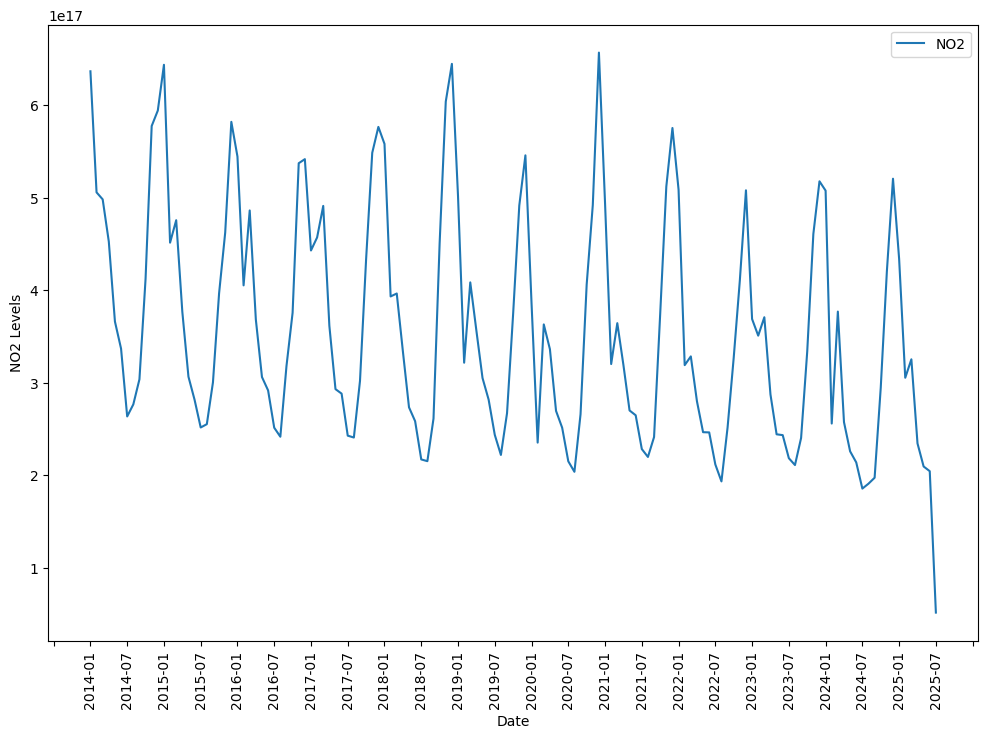

In [18]:
plt.figure(figsize=(12,8))

plt.plot(merged_data['YearMonth'],merged_data['NO2'],label = 'NO2')
plt.xlabel('Date')
plt.ylabel('NO2 Levels')
plt.xticks(rotation =90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))
plt.legend()
plt.show()

In [19]:
df_coal = pd.read_csv("coal.csv")
df_coal.columns =['date','coal']
df_coal_month = month_avg(df_coal)

In [20]:
merged_data2 = pd.merge(
    merged_data, df_coal_month)

<Figure size 1600x1000 with 0 Axes>

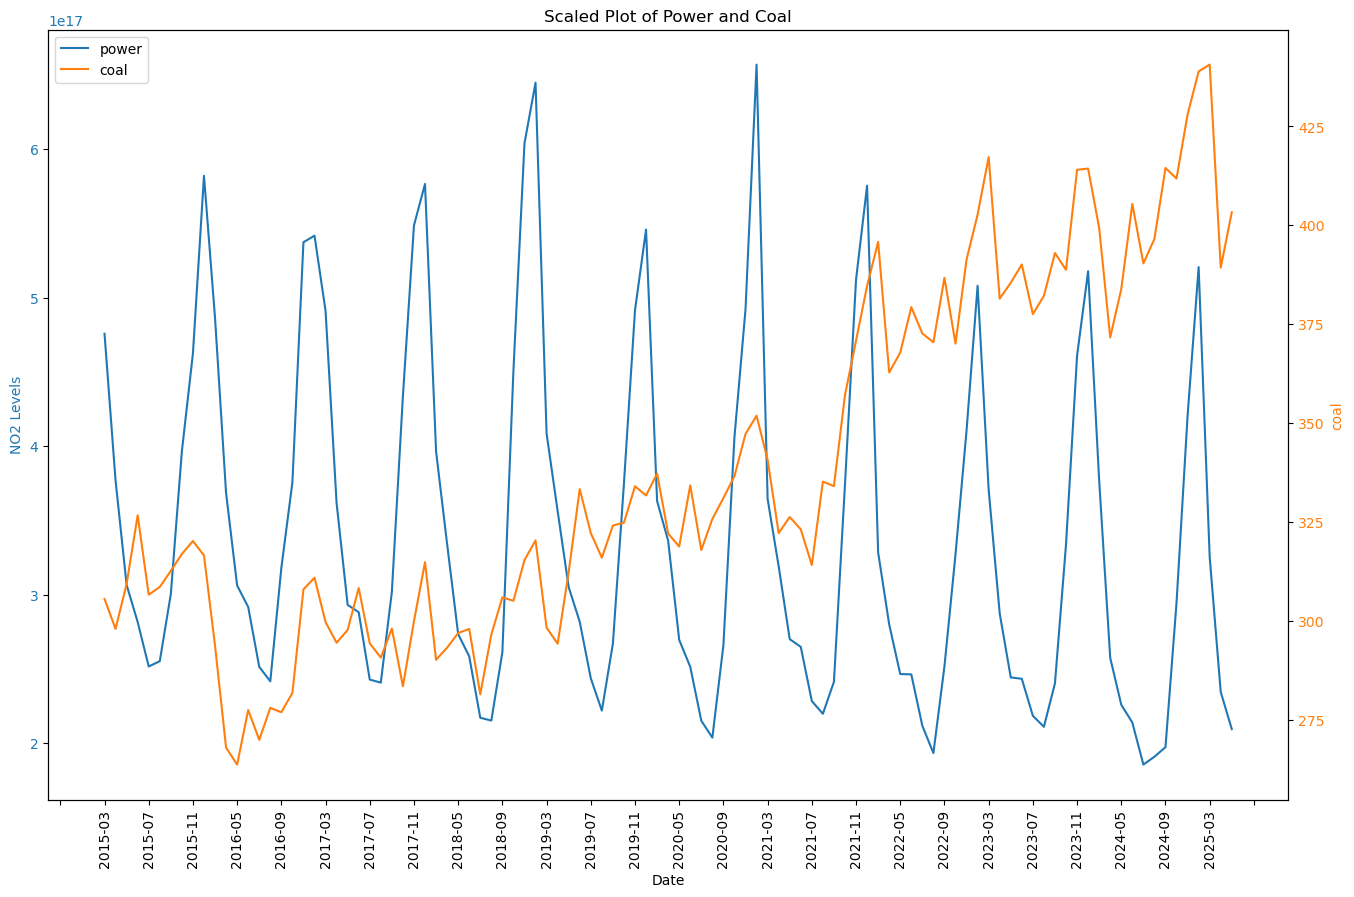

In [21]:
plt.figure(figsize=(16,10))

fig, ax1 = plt.subplots(figsize=(16, 10))
ax1.plot(merged_data2['YearMonth'], merged_data2['NO2'], color='tab:blue', label='power plants')
ax1.set_xlabel('Date')
ax1.set_ylabel('NO2 Levels', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.xaxis.set_major_locator(plt.MaxNLocator(30))
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.plot(merged_data2['YearMonth'], merged_data2['coal'], color='tab:orange', label='coal')
ax2.set_ylabel('coal', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# 두 번째 y축 (coal)

# 범례 추가
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Scaled Plot of Power plant and Coal')
plt.show()